In [1]:
import pandas as pd
import re
import os
import sys
import pickle as pkl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import json

sys.path.append('../front_end')

df_annotations = pd.read_csv("../data/ctgov/annotations/all_annotations.csv")


In [2]:
REPO_DIR = os.getcwd() + "/../"

In [3]:
MODELS_DIR = REPO_DIR + '/front_end/models/'

In [4]:
df_val = df_annotations[df_annotations.train_val == "val"]

In [5]:
accuracy_scores = {}
auc_scores = {}

In [6]:
cwd = os.getcwd()

In [7]:
os.chdir('../front_end')

In [8]:
from util.protocol_master_processor import MasterProcessor

master_processor = MasterProcessor("models/condition_classifier.pkl.bz2",
                                   "models/phase_rf_classifier.pkl.bz2",
                                   "models/spacy-textcat-phase-04-model-best",
                                   "models/sap_classifier_document_level.pkl.bz2",
                                   "models/sap_classifier.pkl.bz2",
                                   "models/effect_estimate_classifier.pkl.bz2",
                                   "models/num_subjects_classifier.pkl.bz2",
                                   "models/subjects_classifier_document_level.pkl.bz2",
                                   "models/arms_classifier_document_level.pkl.bz2",
                                   "models/spacy-textcat-arms-21-model-best",
                                   "models/spacy-textcat-international-11-model-best",
                                   "models/spacy-textcat-country-16-model-best",
                                   "models/international_classifier.pkl.bz2",
                                   "models/country_ensemble_model.pkl.bz2",
                                   "models/simulation_classifier.pkl.bz2")

2023-01-23 11:55:53.617381: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 11:55:53.958697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-23 11:55:53.958712: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-23 11:55:53.985960: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-23 11:56:09.204035: W tensorflow/stream_executor/platform/de

Initialising Phase Random Forest classifier models/phase_rf_classifier.pkl.bz2


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.4.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Initialising SAP document level classifier models/sap_classifier_document_level.pkl.bz2
Initialising Num Arms classifier models/arms_classifier_document_level.pkl.bz2


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:32

Initialising int classifier models/international_classifier.pkl.bz2


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator BernoulliNB from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Get predictions

In [9]:
pred_phase = []
pred_sap =[]
pred_num_subjects = []
pred_num_arms = []
with open("log_output.txt", "w", encoding="utf-8") as fl:
    def log(l):
        fl.write(l)
        
    for i in range(len(df_val)):
        file_name = df_val.file.iloc[i]

        with open(REPO_DIR + "/data/ctgov/json/" + file_name + ".json", "r", encoding="utf-8") as f:
            pages = json.load(f)

        results = master_processor.process_protocol(
            pages, log, disable=["condition", # "phase","sap", "num_subjects", 
                  "effect_estimate","country", "simulation"
            ])
        
        pred_phase.append(results[2]['prediction'])
        pred_sap.append(results[3]['prediction'])
        pred_num_subjects.append(results[5]['prediction'])
        pred_num_arms.append(results[6]['prediction'])        

In [10]:
df_val["pred_phase"] = pred_phase
df_val["pred_sap"] = pred_sap
df_val["pred_num_subjects"] = pred_num_subjects
df_val["pred_num_arms"] = pred_num_arms

/tmp/ipykernel_15271/2096214968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["pred_phase"] = pred_phase
/tmp/ipykernel_15271/2096214968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["pred_sap"] = pred_sap
/tmp/ipykernel_15271/2096214968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [11]:
df_val

,file,nct_id,train_val,num_arms,num_subjects,phase,intervention_type,country,has_sap,pred_phase,pred_sap,pred_num_subjects,pred_num_arms
12,00_NCT01887600_Prot_000.pdf,NCT01887600,val,2.0,594.0,Phase 3,Drug,"BY,BE,BG,CO,DO,EE,GE,GR,GT,HU,IT,PA,PE,PL,RO,R...",0,3.0,0,450,2
49,00_NCT02821000_Prot_SAP_000.pdf,NCT02821000,val,1.0,103.0,Phase 1,Biological,CN,1,1.0,0,100,1
50,00_NCT02827500_Prot_000.pdf,NCT02827500,val,2.0,104.0,Phase 4,Drug,US,0,4.0,1,450,2
51,00_NCT02839200_Prot_000.pdf,NCT02839200,val,6.0,360.0,Phase 2,Drug,"US,DE,HU,IL,ES,SE",0,2.0,0,50,2
52,00_NCT02862600_Prot_000.pdf,NCT02862600,val,1.0,35.0,Phase 2,Drug,US,0,2.0,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,99_NCT03813199_Prot_000.pdf,NCT03813199,val,3.0,60.0,Phase 2,Drug,"BE,CZ,FR,HU,PL",0,2.0,0,60,3
11904,99_NCT03818399_Prot_SAP_000.pdf,NCT03818399,val,1.0,19.0,Phase 3,Drug,US,1,3.0,0,100,2
11905,99_NCT03826199_Prot_SAP_000.pdf,NCT03826199,val,NaN,222.0,Phase 4,Drug,ZA,1,2.0,1,220,2
11906,99_NCT03870399_Prot_SAP_ICF_000.pdf,NCT03870399,val,1.0,17.0,Phase 2,Drug,BR,1,2.0,1,22,1


# Evaluate the phase extractor

In [12]:
df_val_phase_ground_truth_known = df_val[~df_val.phase.isna()]

In [13]:
# convert phase from float value to string value
pred_phase_preprocessed = df_val_phase_ground_truth_known.pred_phase.map(
    {0:'Not Applicable',
    1:'Phase 1',
    1.5:'Phase 1/Phase 2',
    2:'Phase 2',
    2.5:'Phase 2/Phase 3',
    3:'Phase 3',
    3.5:'Phase 3/Phase 4',
    4:'Phase 4'},
)

In [14]:
acc = accuracy_score(df_val_phase_ground_truth_known.phase.apply(str), pred_phase_preprocessed.apply(str))
print (f"Phase accuracy {acc}")

Phase accuracy 0.750236518448439


''

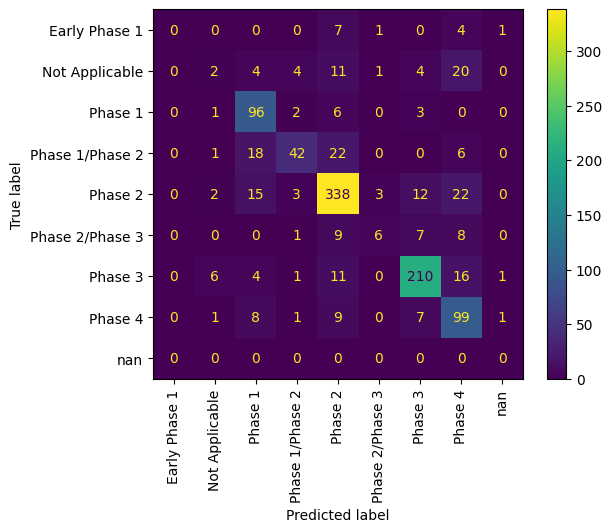

In [15]:
ConfusionMatrixDisplay.from_predictions(df_val_phase_ground_truth_known.phase.apply(str), pred_phase_preprocessed.apply(str))
plt.xticks(rotation=90)
;

# Evaluate the number of subjects extractor

In [16]:
df_val_num_subjects_ground_truth_known = df_val[~df_val.num_subjects.isna()]

In [17]:
df_val_num_subjects_ground_truth_known

,file,nct_id,train_val,num_arms,num_subjects,phase,intervention_type,country,has_sap,pred_phase,pred_sap,pred_num_subjects,pred_num_arms
12,00_NCT01887600_Prot_000.pdf,NCT01887600,val,2.0,594.0,Phase 3,Drug,"BY,BE,BG,CO,DO,EE,GE,GR,GT,HU,IT,PA,PE,PL,RO,R...",0,3.0,0,450,2
49,00_NCT02821000_Prot_SAP_000.pdf,NCT02821000,val,1.0,103.0,Phase 1,Biological,CN,1,1.0,0,100,1
50,00_NCT02827500_Prot_000.pdf,NCT02827500,val,2.0,104.0,Phase 4,Drug,US,0,4.0,1,450,2
51,00_NCT02839200_Prot_000.pdf,NCT02839200,val,6.0,360.0,Phase 2,Drug,"US,DE,HU,IL,ES,SE",0,2.0,0,50,2
52,00_NCT02862600_Prot_000.pdf,NCT02862600,val,1.0,35.0,Phase 2,Drug,US,0,2.0,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11903,99_NCT03813199_Prot_000.pdf,NCT03813199,val,3.0,60.0,Phase 2,Drug,"BE,CZ,FR,HU,PL",0,2.0,0,60,3
11904,99_NCT03818399_Prot_SAP_000.pdf,NCT03818399,val,1.0,19.0,Phase 3,Drug,US,1,3.0,0,100,2
11905,99_NCT03826199_Prot_SAP_000.pdf,NCT03826199,val,NaN,222.0,Phase 4,Drug,ZA,1,2.0,1,220,2
11906,99_NCT03870399_Prot_SAP_ICF_000.pdf,NCT03870399,val,1.0,17.0,Phase 2,Drug,BR,1,2.0,1,22,1


In [18]:
num_subjects_ground_truths = df_val_num_subjects_ground_truth_known.num_subjects.apply(int)
num_subjects_predictions = df_val_num_subjects_ground_truth_known.pred_num_subjects.apply(int)

In [19]:
acc = accuracy_score(num_subjects_ground_truths, num_subjects_predictions)
print (f"Num subjects accuracy {acc}")

Num subjects accuracy 0.13548387096774195


In [40]:
from math import log10, floor
def round_to_1(x):
    if x < 10:
        return 10
    if x is None or pd.isna(x) or x <= 0:
        return 0
    return round(x, -int(floor(log10(abs(x)))))

In [41]:
num_subjects_ground_truths_binned = num_subjects_ground_truths.apply(round_to_1)

In [42]:
num_subjects_predictions_binned = num_subjects_predictions.apply(round_to_1)

''

<Figure size 800x800 with 0 Axes>

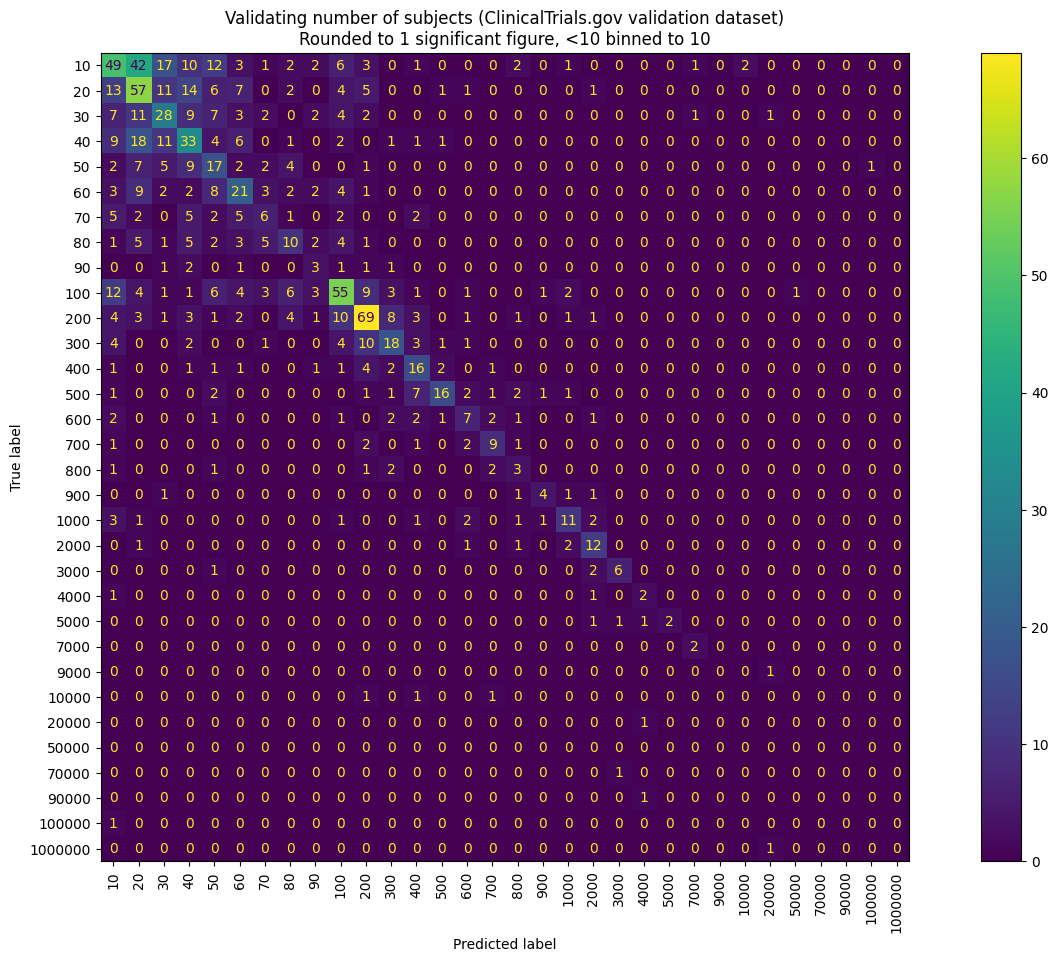

In [60]:
from matplotlib.pyplot import figure

figure(figsize=(10,10), dpi=80)
ConfusionMatrixDisplay.from_predictions(num_subjects_ground_truths_binned, num_subjects_predictions_binned)
plt.xticks(rotation=90)
plt.title("Validating number of subjects (ClinicalTrials.gov validation dataset)\nRounded to 1 significant figure, <10 binned to 10")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
;

In [46]:
mean_absolute_error(num_subjects_ground_truths, num_subjects_predictions)

1470.005529953917

In [47]:
np.sqrt(mean_squared_error(num_subjects_ground_truths, num_subjects_predictions))

30343.866909343997

# Evaluate the SAP extractor

In [48]:
sap_ground_truths = df_val.has_sap.apply(int)
sap_predictions =  df_val.pred_sap.apply(int)

''

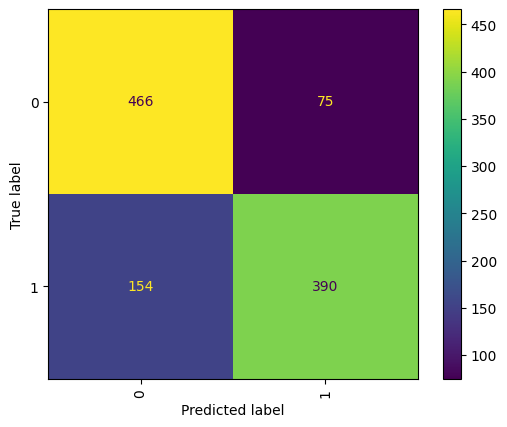

In [49]:
ConfusionMatrixDisplay.from_predictions(sap_ground_truths, sap_predictions)
plt.xticks(rotation=90)
;

In [50]:
acc = accuracy_score(sap_ground_truths, sap_predictions)
print (f"SAP accuracy {acc}")

SAP accuracy 0.7889400921658987


# Evaluate the number of arms extractor

In [51]:
df_val_num_arms_ground_truth_known = df_val[~df_val.num_arms.isna()]

In [52]:
num_arms_ground_truths = df_val_num_arms_ground_truth_known.num_arms.apply(int)
num_arms_predictions = df_val_num_arms_ground_truth_known.pred_num_arms.apply(int)

In [54]:
acc = accuracy_score(num_arms_ground_truths, num_arms_predictions)
print (f"Num arms accuracy {acc}")

Num arms accuracy 0.5814393939393939


''

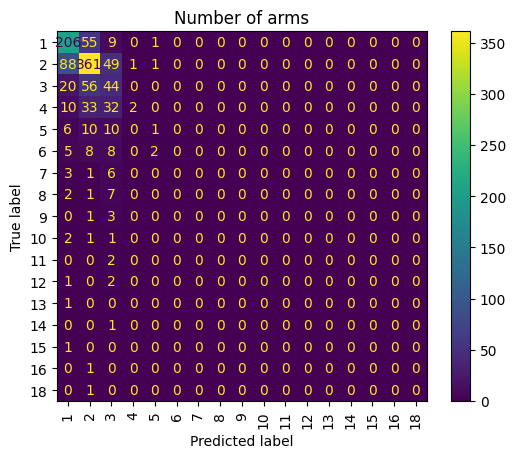

In [56]:
ConfusionMatrixDisplay.from_predictions(num_arms_ground_truths, num_arms_predictions)
plt.xticks(rotation=90)
plt.title("Number of arms")
;